In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [26]:
rhpass=pd.read_csv("scan_win2003.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-15 12:30:28,10.10.10.30,58.27.86.223,TCP,66,"57646 > 80 [FIN, ACK] Seq=1 Ack=1 Win=336 Len=..."
1,2,2011-11-15 12:30:32,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.25? Tell 10.10.10.20
2,3,2011-11-15 12:30:32,Tp-LinkT_80:e5:1a,Micro-St_60:f7:fb,ARP,60,10.10.10.25 is at d8:5d:4c:80:e5:1a
3,4,2011-11-15 12:30:32,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.20
4,5,2011-11-15 12:30:32,3com_68:a6:95,Micro-St_60:f7:fb,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95


In [27]:
rhpass.describe()

,No.,Length
count,677914.000000,677914.000000
mean,338957.500000,294.668173
std,195697.059531,479.635173
min,1.000000,42.000000
25%,169479.250000,60.000000
50%,338957.500000,62.000000
75%,508435.750000,246.000000
max,677914.000000,1514.000000


In [28]:
rhpass['Info'].describe()

count                                 677881
unique                                415388
top       [TCP segment of a reassembled PDU]
freq                                   85112
dtype: object

In [29]:
infodata = rhpass[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [30]:
infodata.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-15 12:30:28,10.10.10.30,58.27.86.223,TCP,66,"57646 > 80 [FIN, ACK] Seq=1 Ack=1 Win=336 Len=..."
1,2011-11-15 12:30:32,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.25? Tell 10.10.10.20
2,2011-11-15 12:30:32,Tp-LinkT_80:e5:1a,Micro-St_60:f7:fb,ARP,60,10.10.10.25 is at d8:5d:4c:80:e5:1a
3,2011-11-15 12:30:32,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.20
4,2011-11-15 12:30:32,3com_68:a6:95,Micro-St_60:f7:fb,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95


In [31]:
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol           
10.10.10.1  10.10.10.15 TCP             360
10.10.10.15 10.10.10.1  TCP             372
            10.10.10.20 TCP             372
            10.10.10.25 ASF             240
                        BFD Control     156

In [32]:
category_group.unstack().head()

Length                                    \
Protocol                     ARP  ASF  BFD Control  BOOTP  BROWSER   
Source      Destination                                              
10.10.10.1  10.10.10.15      NaN  NaN          NaN    NaN      NaN   
10.10.10.15 10.10.10.1       NaN  NaN          NaN    NaN      NaN   
            10.10.10.20      NaN  NaN          NaN    NaN      NaN   
            10.10.10.25      NaN  240          156    214      NaN   
            10.10.10.255     NaN  NaN          NaN    NaN     4145   

                                                                       ...    \
Protocol                  CLASSIC-STUN  CLDAP  COTP  DAYTIME  DCERPC   ...     
Source      Destination                                                ...     
10.10.10.1  10.10.10.15            NaN    NaN   NaN      NaN     NaN   ...     
10.10.10.15 10.10.10.1             NaN    NaN   NaN      NaN     NaN   ...     
            10.10.10.20            NaN    NaN   NaN      NaN     NaN   ...     
            10.10.10.25            280    107   510      264   14130   ...     
            10.10.10.255           NaN    NaN   NaN      NaN     NaN   ...     

                                                                  \
Protocol                  TFTP  TIME  TPKT    UDP  UDPENCAP  VNC   
Source      Destination                                            
10.10.10.1  10.10.10.15    NaN   NaN   NaN    NaN       NaN  NaN   
10.10.10.15 10.10.10.1     NaN   NaN   NaN    NaN       NaN  NaN   
            10.10.10.20    NaN   NaN   NaN    NaN       NaN  NaN   
            10.10.10.25    810   NaN   172  12577       NaN  NaN   
            10.10.10.255   NaN   NaN   NaN    NaN       NaN  NaN   

                                                                    
Protocol                  WINS-Replication  WKSSVC  XDMCP  eDonkey  
Source      Destination                                             
10.10.10.1  10.10.10.15                NaN     NaN    NaN      NaN  
10.10.10.15 10.10.10.1                 NaN     NaN    NaN      NaN  
            10.10.10.20                NaN     NaN    NaN      NaN  
            10.10.10.25               1636    2920    120      226  
            10.10.10.255               NaN     NaN    NaN      NaN  

[5 rows x 90 columns]

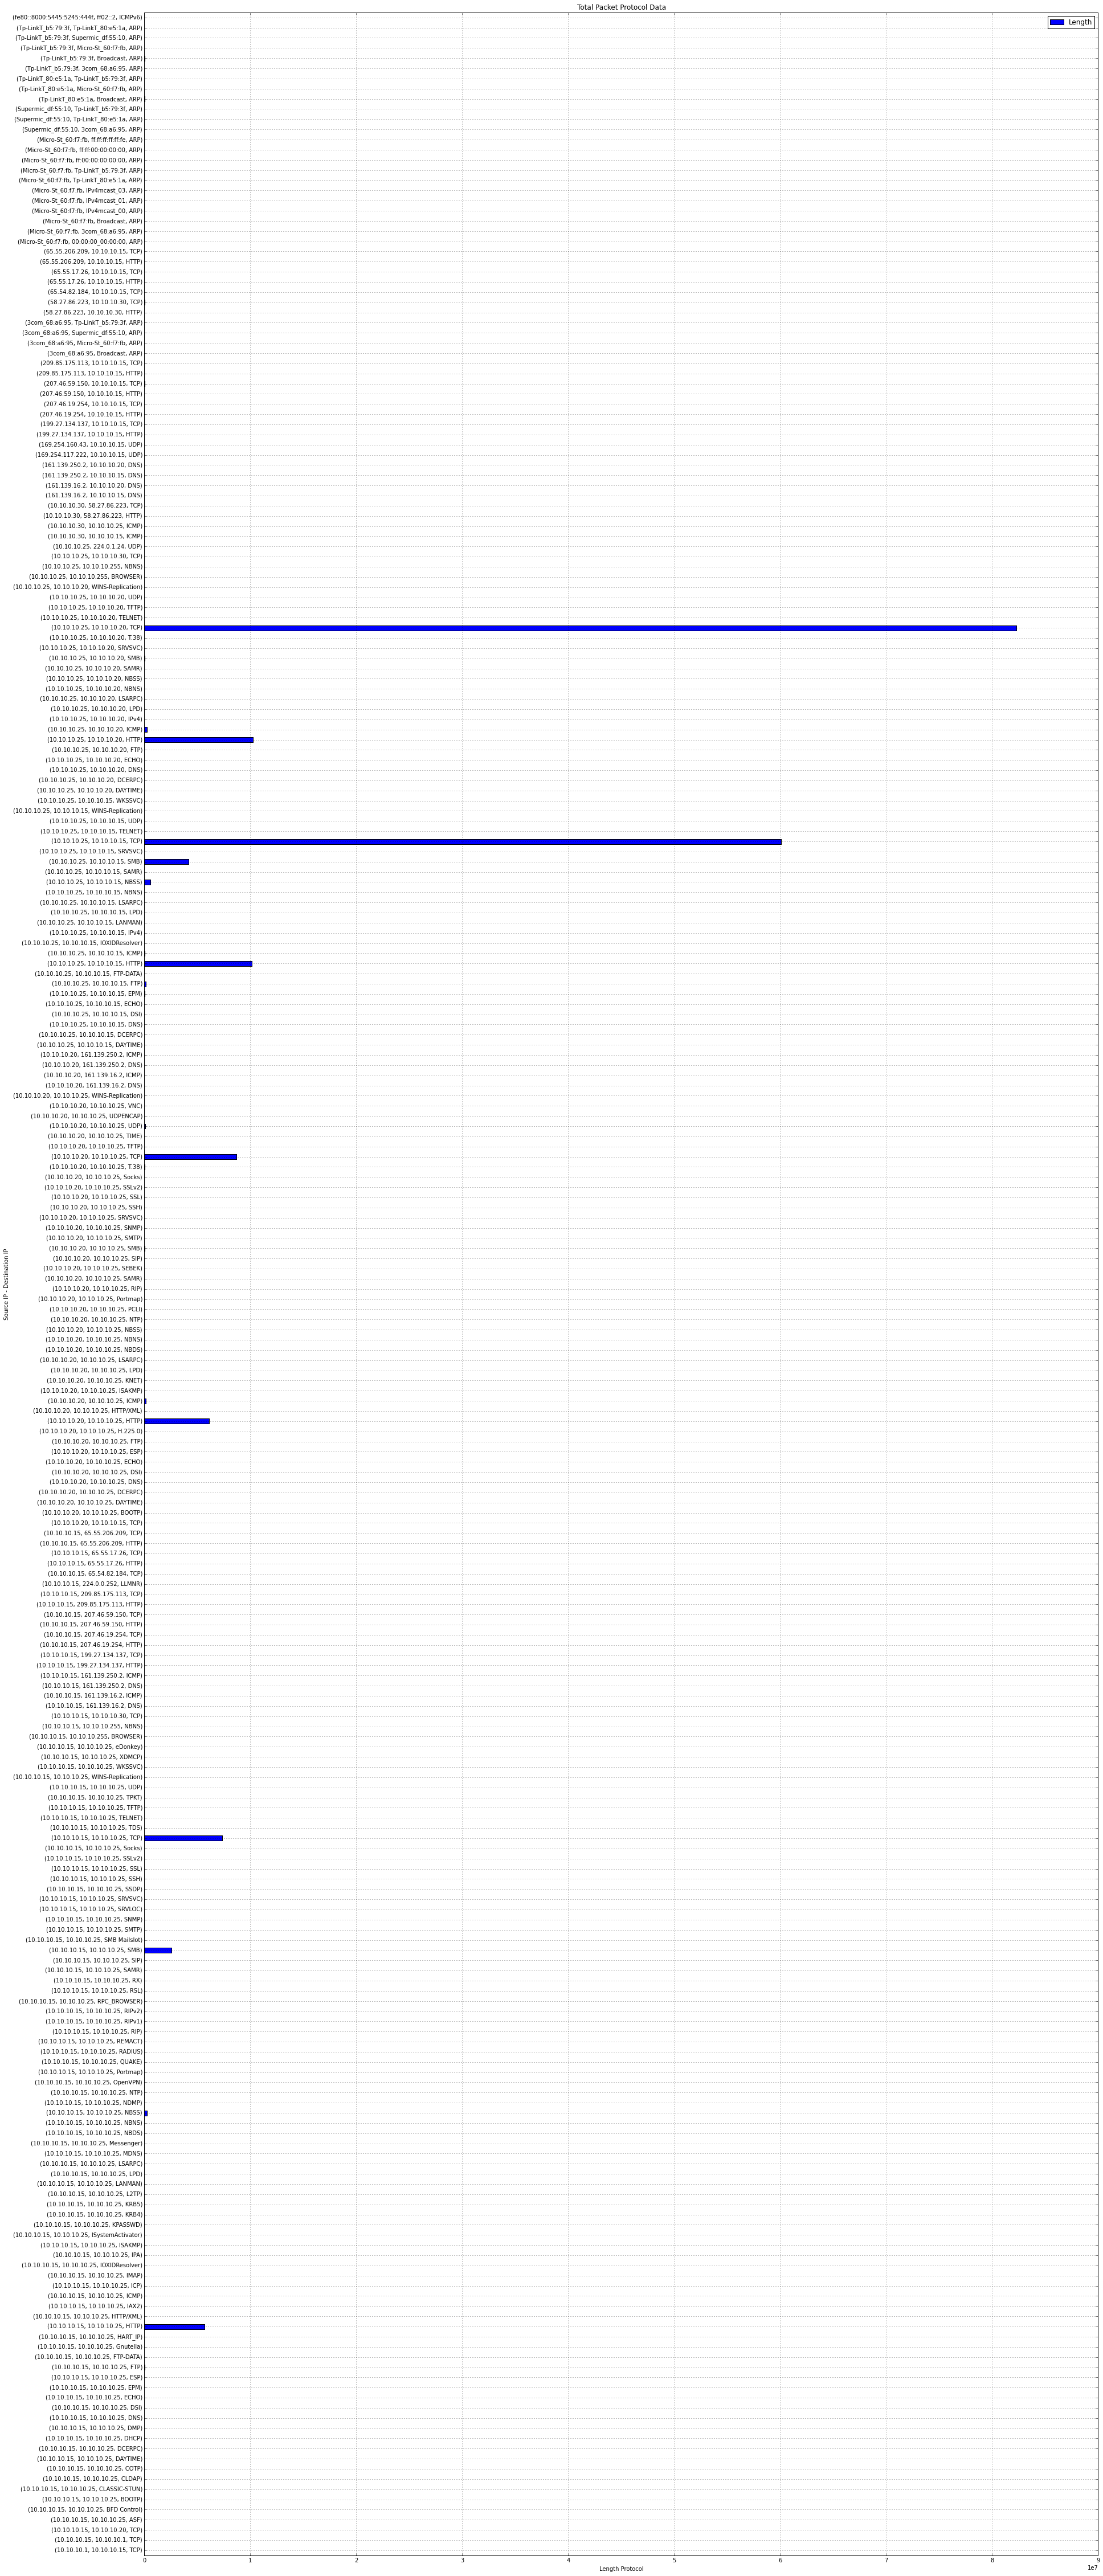

In [33]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Packet Protocol Data",figsize=(30,80))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [34]:
fig = my_plot.get_figure()
fig.savefig("total-packet-protocol-data-redhat-passguessing.png")

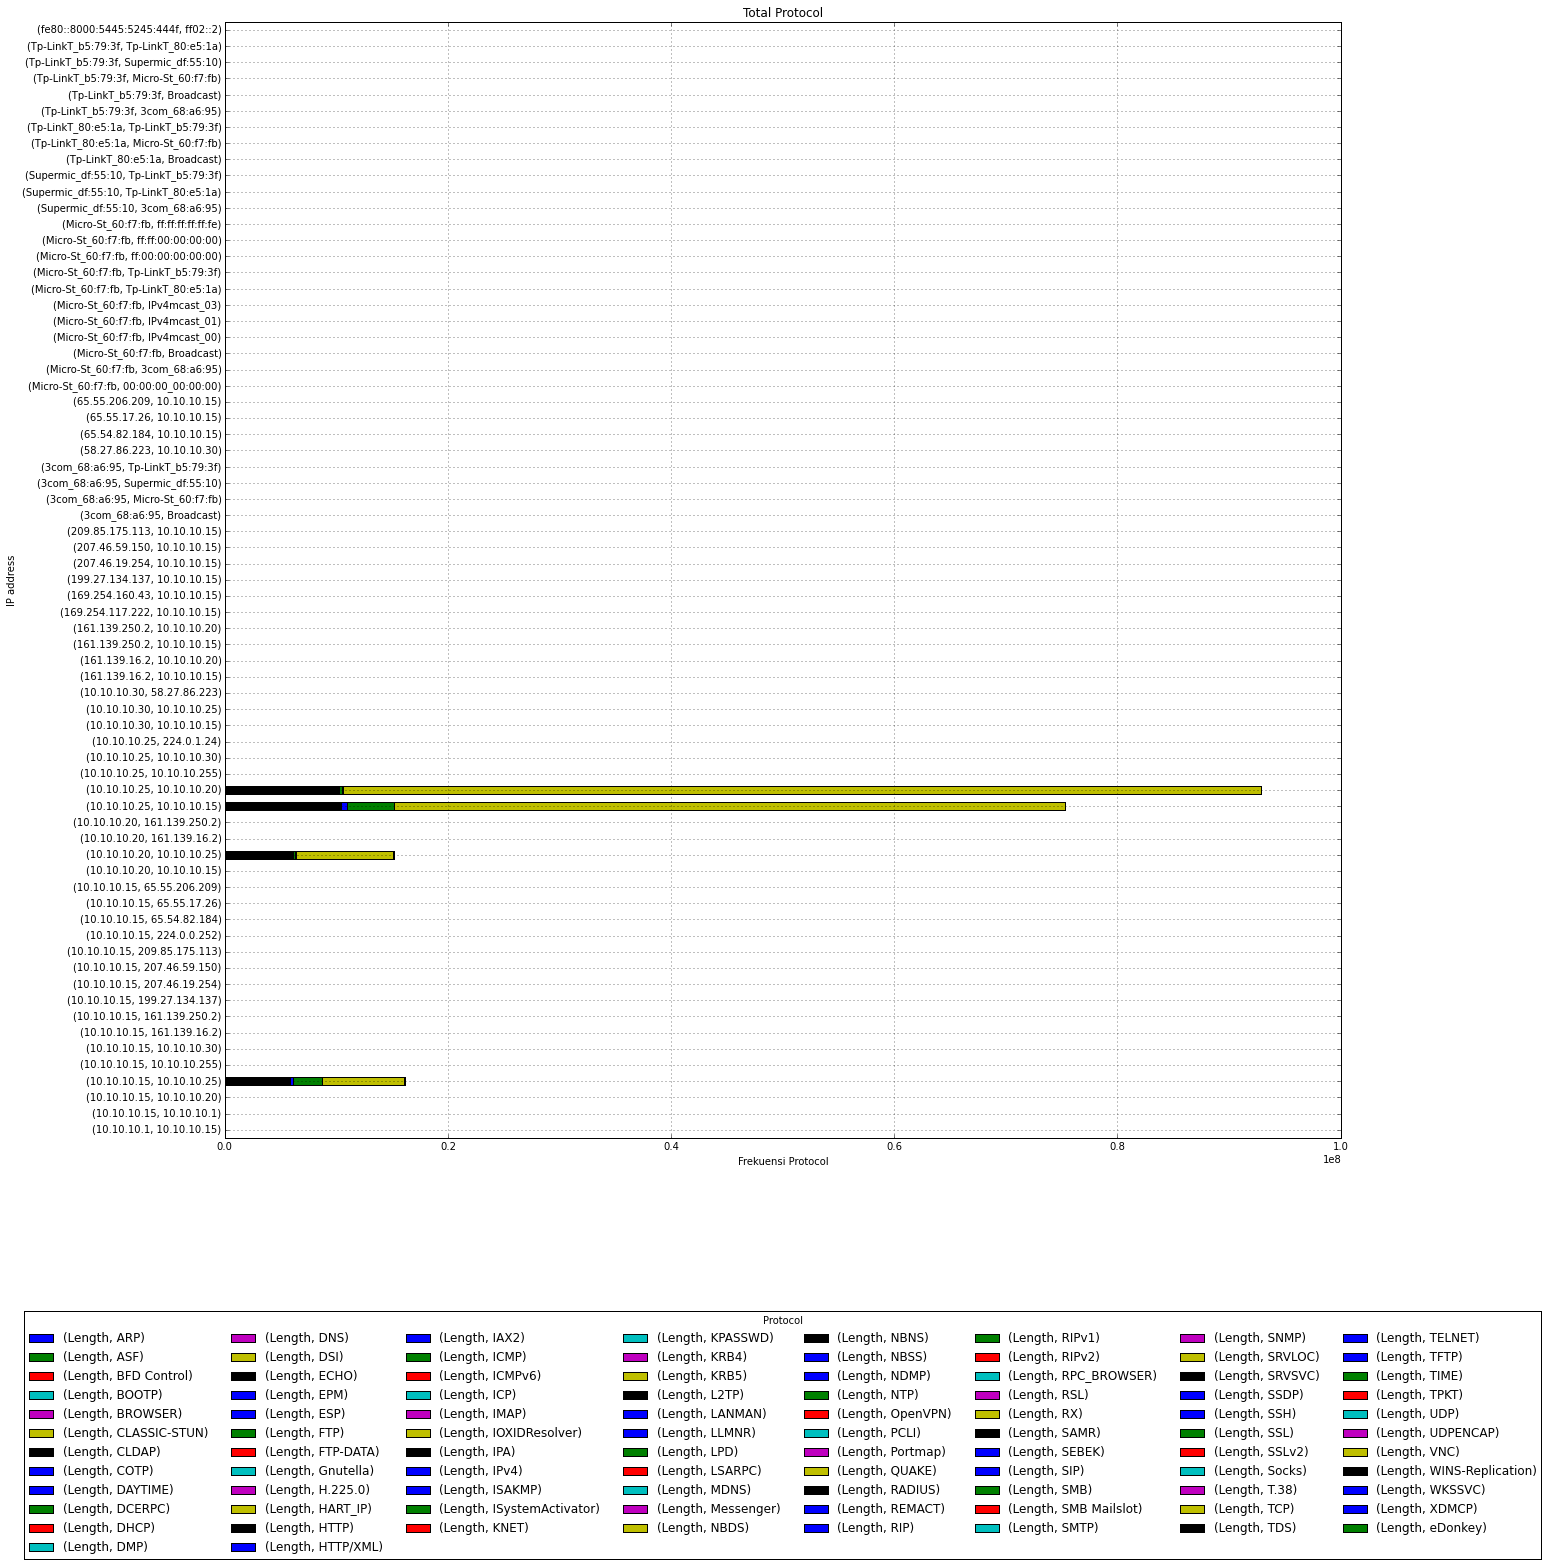

In [35]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")

In [36]:
fig = my_plot.get_figure()
fig.savefig("total-protocol-redhat-passguessing.png")

In [37]:
infodata2 = rhpass[['Time','Length','Info']]
infodata2.head()

,Time,Length,Info
0,2011-11-15 12:30:28,66,"57646 > 80 [FIN, ACK] Seq=1 Ack=1 Win=336 Len=..."
1,2011-11-15 12:30:32,60,Who has 10.10.10.25? Tell 10.10.10.20
2,2011-11-15 12:30:32,60,10.10.10.25 is at d8:5d:4c:80:e5:1a
3,2011-11-15 12:30:32,60,Who has 10.10.10.1? Tell 10.10.10.20
4,2011-11-15 12:30:32,60,10.10.10.1 is at 00:50:04:68:a6:95


In [38]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-15 12:30:28,66,"57646 > 80 [FIN, ACK] Seq=1 Ack=1 Win=336 Len=..."
2011-11-15 12:30:32,60,Who has 10.10.10.25? Tell 10.10.10.20
2011-11-15 12:30:32,60,10.10.10.25 is at d8:5d:4c:80:e5:1a
2011-11-15 12:30:32,60,Who has 10.10.10.1? Tell 10.10.10.20
2011-11-15 12:30:32,60,10.10.10.1 is at 00:50:04:68:a6:95


In [39]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-15 12:30:00,194737
2011-11-15 12:31:00,25367
2011-11-15 12:32:00,8253738
2011-11-15 12:33:00,542655
2011-11-15 12:34:00,621326


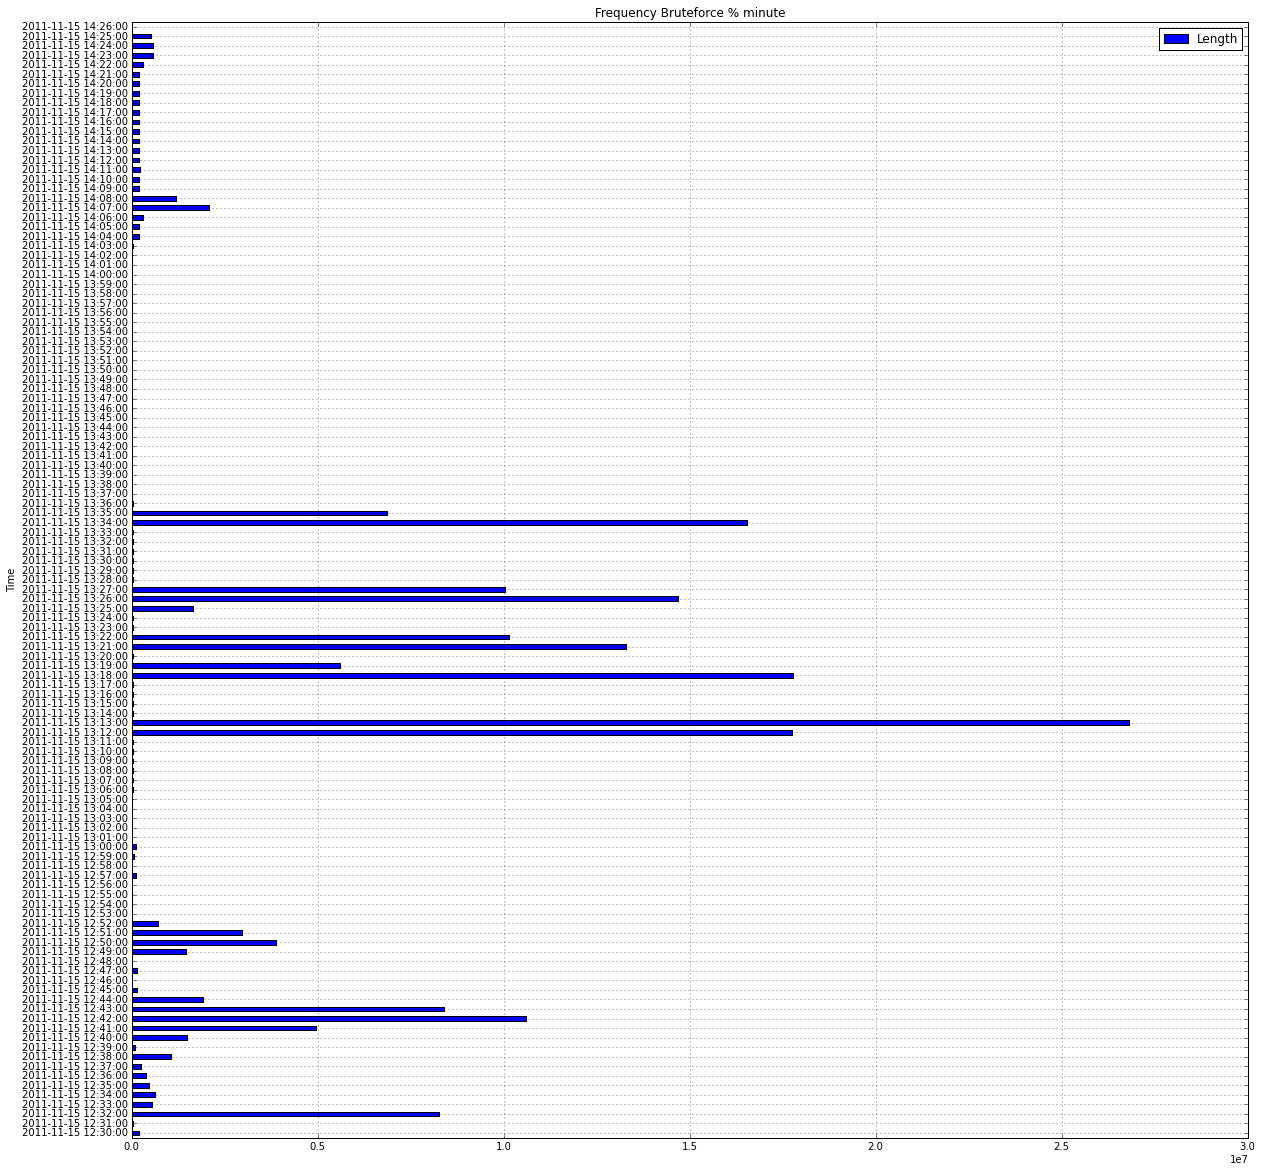

In [40]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Bruteforce % minute",style="r",figsize=(20,20))

In [41]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packet-by-minute.png")

In [42]:
infodata2 = rhpass[['Length','Time']]
infodata2.head()

,Length,Time
0,66,2011-11-15 12:30:28
1,60,2011-11-15 12:30:32
2,60,2011-11-15 12:30:32
3,60,2011-11-15 12:30:32
4,60,2011-11-15 12:30:32


In [43]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length
Time,
2011-11-15 12:30:28,66
2011-11-15 12:30:32,60
2011-11-15 12:30:32,60
2011-11-15 12:30:32,60
2011-11-15 12:30:32,60


In [44]:
infodata2.resample('S',how=sum).head()

,Length
Time,
2011-11-15 12:30:28,66
2011-11-15 12:30:29,NaN
2011-11-15 12:30:30,NaN
2011-11-15 12:30:31,NaN
2011-11-15 12:30:32,39939


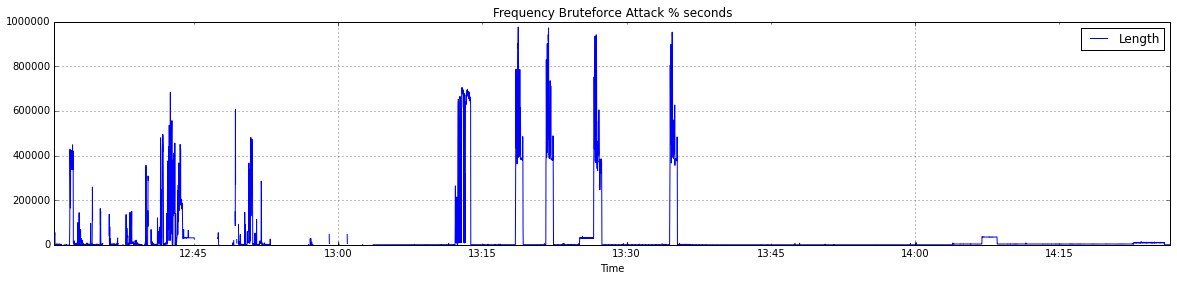

In [45]:
infodata2_plot = infodata2.resample('S',how=sum).plot(title="Frequency Bruteforce Attack % seconds",figsize=(20,4))

In [46]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packet-by-seconds.png")